# Day 01 - bigram approach

In [5]:
NAMES_PATH = "/Users/mikolaj/Developer/powielacz/data/names.txt"

In [6]:
words = open(NAMES_PATH, "r").read().splitlines()
print(words[:10])
print(len(words))

['egon', 'dymitr', 'rudolf', 'ingrid', 'berta', 'aleksander', 'adam', 'gerhard', 'balbina', 'teresa']
600


In [7]:
min([len(word) for word in words])

3

In [8]:
max([len(word) for word in words])

11

In [9]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

In [10]:
sorted(b.items(),key=lambda kv: kv[1], reverse=True)

[(('a', '<E>'), 300),
 (('n', 'a'), 112),
 (('a', 'n'), 90),
 (('a', 'r'), 74),
 (('e', 'r'), 69),
 (('l', 'i'), 66),
 (('<S>', 'a'), 61),
 (('i', 'a'), 61),
 (('e', 'l'), 60),
 (('i', 'n'), 58),
 (('t', 'a'), 53),
 (('n', '<E>'), 52),
 (('a', 'w'), 52),
 (('ł', 'a'), 52),
 (('o', 'n'), 50),
 (('s', 'z'), 50),
 (('m', 'i'), 49),
 (('<S>', 'm'), 48),
 (('n', 'i'), 47),
 (('m', 'a'), 46),
 (('<S>', 'w'), 46),
 (('<S>', 'e'), 44),
 (('s', 'ł'), 44),
 (('<S>', 'b'), 43),
 (('l', 'a'), 43),
 (('l', 'e'), 42),
 (('e', 'n'), 42),
 (('u', 's'), 42),
 (('z', '<E>'), 42),
 (('r', 'a'), 42),
 (('a', 'l'), 41),
 (('d', 'a'), 41),
 (('<S>', 'l'), 41),
 (('<S>', 'k'), 39),
 (('r', 'y'), 37),
 (('o', 'l'), 36),
 (('<S>', 'j'), 36),
 (('w', 'a'), 36),
 (('w', 'i'), 36),
 (('d', '<E>'), 34),
 (('<S>', 'r'), 33),
 (('s', 't'), 33),
 (('k', 'a'), 33),
 (('i', 'e'), 32),
 (('r', 'o'), 31),
 (('j', 'a'), 30),
 (('w', '<E>'), 28),
 (('d', 'o'), 26),
 (('<S>', 's'), 26),
 (('<S>', 'd'), 25),
 (('r', '<E>'), 

In [11]:
import torch

In [12]:
a = torch.zeros((3,5),dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [13]:
a[1,3] += 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [14]:
uq_chars = sorted(list({ch for w in words for ch in w}))
len(uq_chars)
# ó, ę, ł, ń, ś, ż
# x, q missing

30

In [52]:
N = torch.zeros((31,31),dtype=torch.int32)


In [53]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
#stoi['<S>'] = 30
# stoi['<E>'] = 31
stoi["."] = 0

In [54]:
for w in words:
    # chs = ["<S>"] + list(w) + ["<E>"]
    chs =  ["."]+ list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.imshow(N)

In [56]:
itos = {i:s for s,i in stoi.items()}

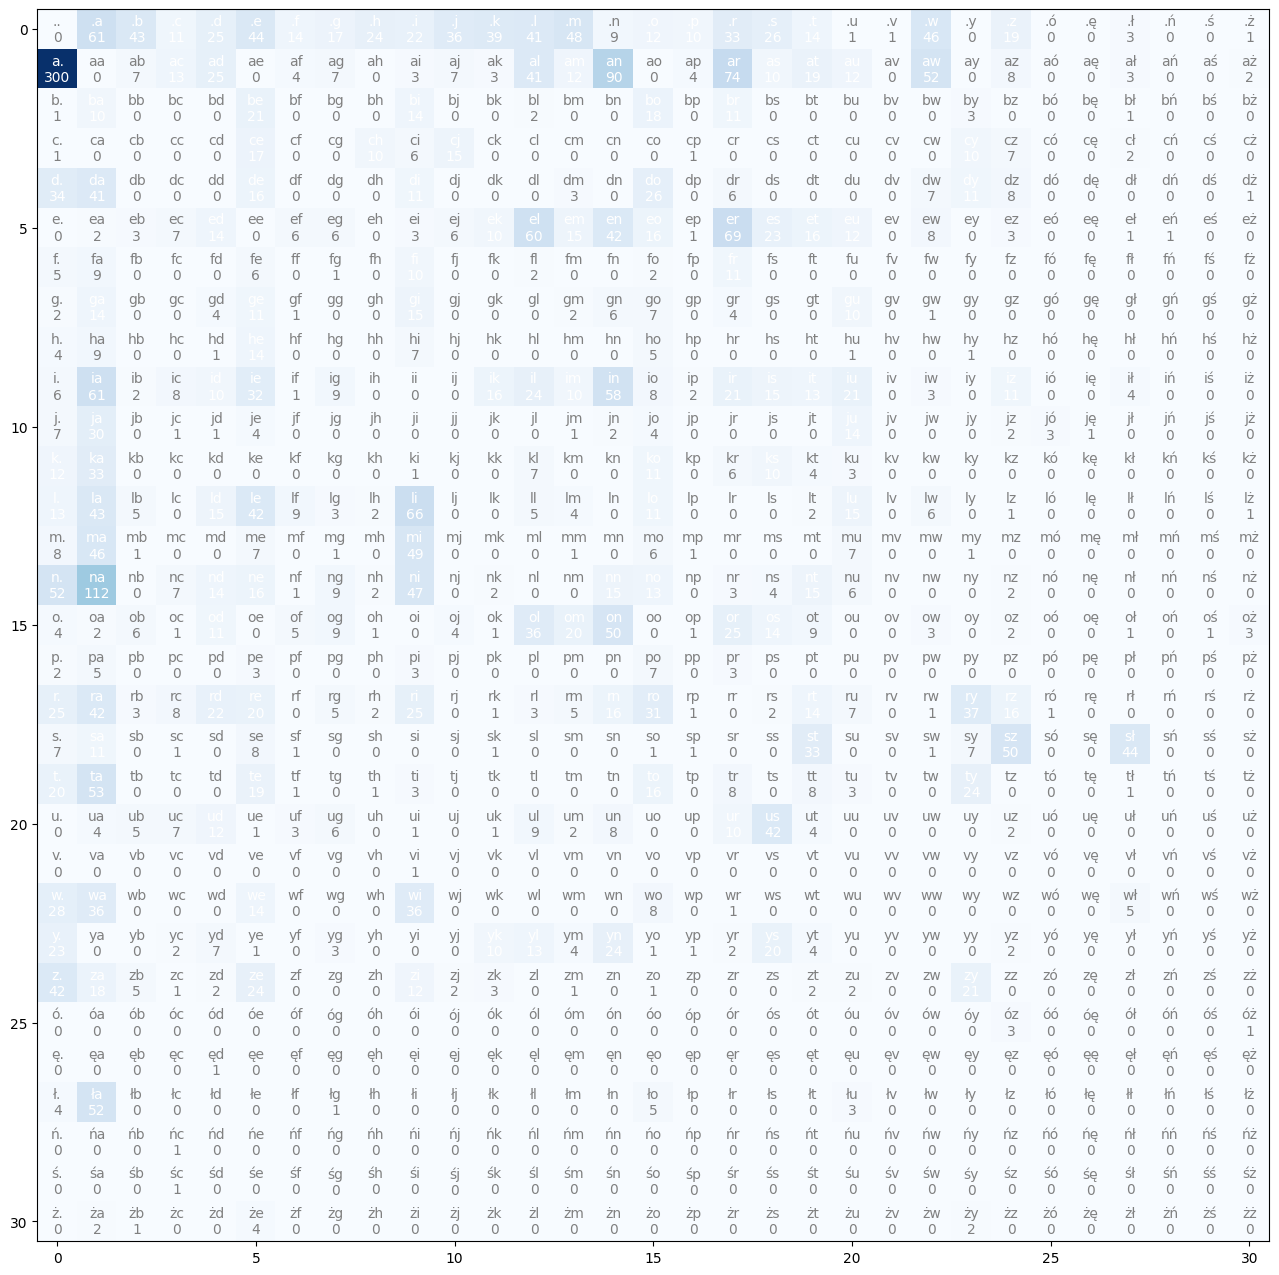

In [57]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        plt.text(j, i, itos[i]+itos[j]+'\n'+str(N[i,j].item()), ha='center', va='center', color='gray' if N[i,j]<10 else 'white')

In [61]:
N[0]

tensor([ 0, 61, 43, 11, 25, 44, 14, 17, 24, 22, 36, 39, 41, 48,  9, 12, 10, 33,
        26, 14,  1,  1, 46,  0, 19,  0,  0,  3,  0,  0,  1], dtype=torch.int32)

In [86]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1017, 0.0717, 0.0183, 0.0417, 0.0733, 0.0233, 0.0283, 0.0400,
        0.0367, 0.0600, 0.0650, 0.0683, 0.0800, 0.0150, 0.0200, 0.0167, 0.0550,
        0.0433, 0.0233, 0.0017, 0.0017, 0.0767, 0.0000, 0.0317, 0.0000, 0.0000,
        0.0050, 0.0000, 0.0000, 0.0017])

In [84]:
"""
g = torch.Generator().manual_seed(42)
p = torch.rand(3, generator=g)
p = p / p.sum()
torch.multinomial(p, num_samples=20,replacement=True, generator=g)
"""

'\ng = torch.Generator().manual_seed(42)\np = torch.rand(3, generator=g)\np = p / p.sum()\ntorch.multinomial(p, num_samples=20,replacement=True, generator=g)\n'

In [88]:
g = torch.Generator().manual_seed(42)
ix= torch.multinomial(p, num_samples=1,replacement=True, generator=g).item()
itos[ix]

'a'

In [96]:
g = torch.Generator().manual_seed(42)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix= torch.multinomial(p, num_samples=1,replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))


a.
muenates.
kta.
olin.
winionererbisłana.
brnanabeliledzargilisła.
eusemia.
bin.
onacjufrdoruna.
brarttawła.
iagina.
tustaponaw.
ia.
enirteronaw.
orinawialikalośchaniusługelema.
amincja.
jarntalelfa.
mirofininnksłodolwiksła.
miarizeuradawellelusłolierusłatymina.
maryliudwidrelinemanda.


In [104]:
# optimisation

P = N.float()
P /= P.sum(1, keepdim=True) # broadcastable!

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix= torch.multinomial(p, num_samples=1,replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

słucyktarpa.
jutrzydarzichuli.
aronat.
anusa.
wa.
